Moving Average based Algorithm
--------------------------------------
The predicted closing price for each day will be the average of a set of previously observed values. 
Instead of using the simple average, we will be using the moving average technique which uses the latest 
set of values for each prediction. 
In other words, for each subsequent step, the predicted values are taken into consideration 
while removing the oldest observed value from the set. 

In [21]:
# import packages
import pandas as pd
import numpy as np

# to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

# setting figure size
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 10

# for normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# read the file
df = pd.read_csv('NSE-TATAGLOBAL.csv')

# print the head
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-17,212.80,213.40,209.50,210.00,210.05,1303397.0,2740.81
1,2018-12-14,212.00,213.35,210.00,213.30,212.35,860565.0,1822.86
2,2018-12-13,213.35,215.70,210.25,212.90,212.40,1196911.0,2552.82
3,2018-12-12,203.15,213.90,203.00,212.65,212.95,1755046.0,3695.14
4,2018-12-11,195.00,203.80,195.00,202.85,202.85,1818568.0,3635.49


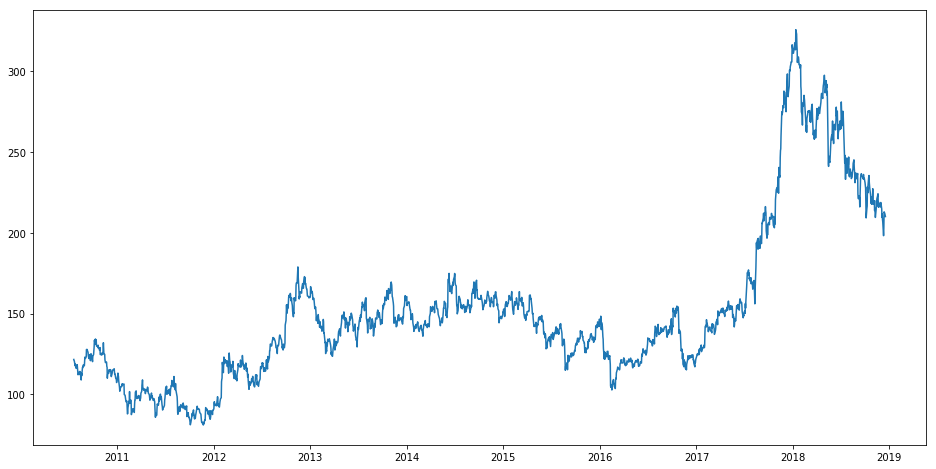

In [22]:
# setting index as date
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

# plot
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='Close Price history')


In [23]:
# creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [24]:
total = len(new_data)
cut_length = 1687
remain = total - cut_length
total, cut_length, remain


(2087, 1687, 400)

In [25]:
# splitting into train and validation
train = new_data[:cut_length]
valid = new_data[cut_length:]


In [26]:
new_data.shape, train.shape, valid.shape


((2087, 2), (1687, 2), (400, 2))

In [27]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()



(Timestamp('2010-07-21 00:00:00'),
 Timestamp('2017-05-08 00:00:00'),
 Timestamp('2017-05-09 00:00:00'),
 Timestamp('2018-12-17 00:00:00'))

In [28]:
# make predictions
preds = []
for i in range(0, remain):
    a = train['Close'][len(train) - remain + i:].sum() + sum(preds)
    b = a / remain
    preds.append(b)


In [29]:
# calculate rmse
rms = np.sqrt(np.mean(np.power((np.array(valid['Close']) - preds), 2)))
rms


110.22724829044698

C:\ProgramData\Miniconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Miniconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


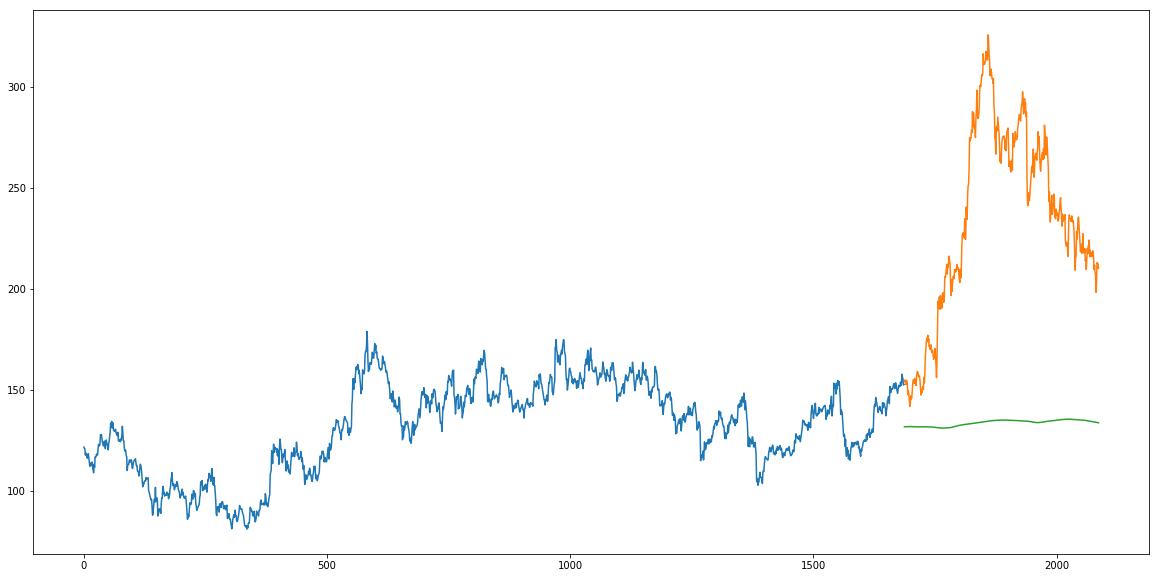

In [30]:
# plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
